# 【ロボティクス基礎】 同次変換行列

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NAVIFOLIO/python_intro/blob/main/notebooks/homogenios_transformation-jp.ipynb)

ロボティクス分野において基礎となる**同次変換行列**の理解を目標として、アフィン変換から丁寧に解説する。  
内容は、Pythonによるハンズオンで内容を確認できるようになっている。  

※ 途中、概念同士を区別するため、あえて数学的な用語を積極的に用いているが、コードベースで理解できていれば問題ない。

- [1. アフィン変換 | Affine Transformation](#section_1)
  - [1-0. 必要ライブラリのインポートと定数の宣言](#section_1_1)
  - [【復習】 1-1. 回転・拡大](#復習-1-1-回転拡大)
  - [1-2. 並進](#1-2-並進)
  - [1-3. 用語等まとめ](#1-3-用語等まとめ)
- [2. 同次変換行列 | Homogenious Transformation Matrix](#2-同次変換行列--homogenious-transformation-matrix)
  - [2-1 回転、拡大の変換行列を3x3にする](#2-1-回転拡大の変換行列を3x3にする)
  - [2-2. 合成変換](#2-2-合成変換)
  - [2-3. 注意：同次変換は交換可能ではない](#2-3-注意同次変換は交換可能ではない)
  - [2-4. まとめ](#2-4-まとめ)
- [3. Pythonによるハンズオンで確認する](#3-pythonによるハンズオンで確認する)
  - [3-1. スタイリングを共通化した、座標平面を出力するクラスを実装する](#3-1-スタイリングを共通化した座標平面を出力するクラスを実装する)
  - [3-2. 回転・拡大・並進とその合成変換を表す行列を用意し、円を変換する](#3-2-回転拡大並進とその合成変換を表す行列を用意し円を変換する)
  - [3-3. 図示による確認](#3-3-図示による確認)


## 1. アフィン変換 | Affine Transformation
<a id="section_1"></a>

図形の変形や座標の変換に用いられる、座標平面上でのある種の変換を総称して、アフィン変換という。  
同次変換行列は、アフィン変換を簡潔に記述するための形式であるから、アフィン変換が何なのかを簡単に知っておく必要がある。  
以下では、アフィン変換のうち、ロボティクス分野で必要な回転・拡大・並進を、基本からわかるように解説する。

### 1-0. 必要ライブラリのインポートと定数の宣言
<a id="sectionn_1_0"></a>

In [60]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as patches

THINGRAY = '#3c3c3c'
LIGHTGRAY = '#778899'
GREEN = '#2e8b57'
BLUE = '#0000cd'
VIOLET = '#c71585'

### 【復習】 1-1. 回転・拡大

- 横にa倍、縦にb倍のズームは、ズーム倍率を対角成分に持つ対角行列
$
\left[\begin{array}{c}
a & 0 \\
0 & b \\
\end{array}\right]
$
で表され、$\theta$回転は、
$
\left[\begin{array}{c}
cos\theta & -sin\theta \\
sin\theta & cos\theta \\
\end{array}\right]
$
で表される。

- 2次元の座標1点$(x_i, y_i)$に対する変換は、例えば点(10, 10)を$x$方向2.0倍、$y$方向0.5倍ズームする変換は、
  
$$
\left[\begin{array}{c}
2.0 & 0 \\
0 & 0.5 \\
\end{array}\right]

\left[\begin{array}{c}
10 \\
10 \\
\end{array}\right]

= 

\left[\begin{array}{c}
12 \\
5 \\
\end{array}\right]
$$

となり、行列積により実現できた。 
   
N点を同時に変換するためには、N点の座標、即ち$(x_i, y_i),\ i = 1, 2, ..., N $を並べたN x 2の行列と変換行列との行列積を取ればよい。再び、ズームを例に確認すると、
  
$$
\left[\begin{array}{c}
a & 0 \\
0 & b \\
\end{array}\right]

\left[\begin{array}{c}
x_1 & .. & x_N \\
y_1 & ... & y_N \\
\end{array}\right]

=

\left[\begin{array}{c}
ax_1 & ... & ax_N \\
by_1 & ... & by_N \\
\end{array}\right]
$$

となる。  
  
`numpy`では、行列積は`numpy.matmul()`で計算できる。  

以下では、長方形をズームして変換前後の図形を図示してみる。

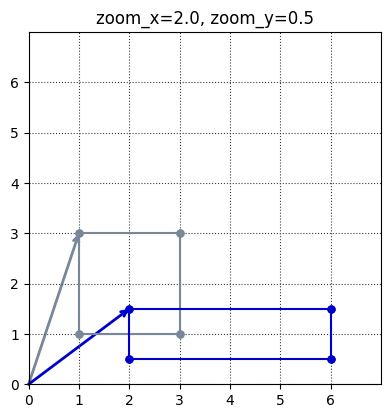

In [61]:
# ズーム倍率
zoom_x = 2.0
zoom_y = 0.5

# ズーム（拡大縮小）行列
z = np.array([
    [zoom_x, 0],
    [0, zoom_y]])

_x = [3.0, 1.0, 1.0, 3.0]
_y = [3.0, 3.0, 1.0, 1.0]

rect = np.array([_x, _y])

# ズームする
zoomed_rect = np.matmul(z, rect)

zoomed_x, zoomed_y = zoomed_rect

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 2, 1)
ax.set_aspect('equal')

ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.set_xticks(np.arange(0, 7, 1.0))
ax.set_yticks(np.arange(0, 7, 1.0))
ax.grid(color=THINGRAY, linestyle=':')
ax.set_title(f'zoom_x={zoom_x}, zoom_y={zoom_y}', loc='center')

ax.plot(_x[:2], _y[:2], marker='.', markersize=10, color=LIGHTGRAY, label= '$B$')
ax.plot(_x[1:3], _y[1:3], marker='.', markersize=10, color=LIGHTGRAY, label= '$B$')
ax.plot(_x[2:4], _y[2:4], marker='.', markersize=10, color=LIGHTGRAY, label= '$B$')
ax.plot([_x[3], _x[0]], [_y[3], _y[0]], marker='.', markersize=10, color=LIGHTGRAY, label= '$B$')

ax.plot(zoomed_x[:2], zoomed_y[:2], marker='.', markersize=10, color=BLUE, label= '$B$')
ax.plot(zoomed_x[1:3], zoomed_y[1:3], marker='.', markersize=10, color=BLUE, label= '$B$')
ax.plot(zoomed_x[2:4], zoomed_y[2:4], marker='.', markersize=10, color=BLUE, label= '$B$')
ax.plot([zoomed_x[3], zoomed_x[0]], [zoomed_y[3], zoomed_y[0]], marker='.', markersize=10, color=BLUE, label= '$B$')

vec1 = patches.ConnectionPatch([0, 0], [_x[1], _y[1]], coordsA='data', arrowstyle='->', color=LIGHTGRAY, linewidth=2)
vec2 = patches.ConnectionPatch([0, 0], [zoomed_x[1], zoomed_y[1]], coordsA='data', arrowstyle='->', color=BLUE, linewidth=2)
ax.add_patch(vec1)
ax.add_patch(vec2)

# Note:
# ズームは、原点を中心としたズームであることに注意する
# 図形上の各点のベクトルの成分が、x成分は2倍に、y成分は0.5倍になるという意味

次に、円に回転・拡大（ズーム）の変換を適用して、それぞれ変換の前後でどのように動くか確認する。

**Note**: 
- 中心を原点とする半径$r$の円上の点の座標は$P = ( rcos\theta, rsin\theta )$であり、中心が原点とは限らない一般の円上の点の座標は、その中心を点$O$とすると、$\vec{O} + \vec{P}$とベクトルで扱う方が計算しやすい。

circle matrix shape: (2, 360)


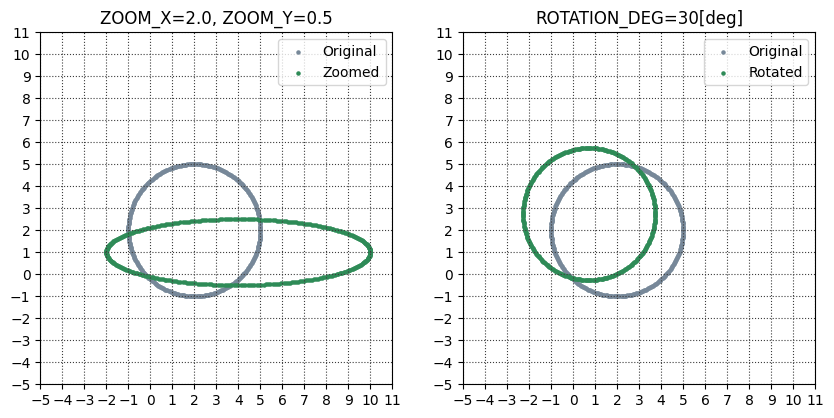

In [62]:
RADIUS = 3.0 # 半径
CENTER = np.array([2.0, 2.0]) # 中心座標
ZOOM_X = 2.0 # x方向ズーム倍率
ZOOM_Y = 0.5 # y方向ズーム倍率
ROTATION_DEG = 30 # 回転角度

ZOOM = np.array([
    [ZOOM_X, 0],
    [0, ZOOM_Y]])

ROTATION = np.array([
    [np.cos(np.radians(ROTATION_DEG)), -np.sin(np.radians(ROTATION_DEG))],
    [np.sin(np.radians(ROTATION_DEG)), np.cos(np.radians(ROTATION_DEG))]])

x_series = np.arange(360, dtype=float)
y_series = np.arange(360, dtype=float)

circle_x = RADIUS * np.cos(np.radians(x_series)) + CENTER[0]
circle_y = RADIUS * np.sin(np.radians(y_series)) + CENTER[1]

# 2次元円の点群としての表現
circle = np.array([circle_x, circle_y])

print(f'circle matrix shape: {circle.shape}')

# 拡大
zoomed_circle = np.matmul(ZOOM, circle)
# 回転
rotated_circle = np.matmul(ROTATION, circle)

fig = plt.figure(figsize=(10, 5))

ax_zoom = fig.add_subplot(1, 2, 1)
ax_zoom.set_aspect('equal')

ax_zoom.set_xlim(-5, 5)
ax_zoom.set_ylim(-5, 5)
ax_zoom.set_xticks(np.arange(-5, 12, 1.0))
ax_zoom.set_yticks(np.arange(-5, 12, 1.0))
ax_zoom.grid(color=THINGRAY, linestyle=':')
ax_zoom.set_title(f'ZOOM_X={ZOOM_X}, ZOOM_Y={ZOOM_Y}', loc='center')

# 散布図にする関係でx, y座標に分解する
ax_zoom.scatter(circle[0], circle[1], s=5, c=LIGHTGRAY, label='Original')
ax_zoom.scatter(zoomed_circle[0], zoomed_circle[1], s=5, c=GREEN, label='Zoomed')
plt.legend()

ax_rotation = fig.add_subplot(1, 2, 2)
ax_rotation.set_aspect('equal')

ax_rotation.set_xlim(-5, 5)
ax_rotation.set_ylim(-5, 5)
ax_rotation.set_xticks(np.arange(-5, 12, 1.0))
ax_rotation.set_yticks(np.arange(-5, 12, 1.0))
ax_rotation.grid(color=THINGRAY, linestyle=':')
ax_rotation.set_title(f'ROTATION_DEG={ROTATION_DEG}[deg]', loc='center')

ax_rotation.scatter(circle[0], circle[1], s=5, c=LIGHTGRAY, label='Original')
ax_rotation.scatter(rotated_circle[0], rotated_circle[1], s=5, c=GREEN, label='Rotated')
plt.legend()

plt.show()

### 1-2. 並進

ロボティクス分野での座標変換や図形変換を表現するために、最低限でも回転・拡大に加えて並進に対応する変換が必要である。  
   
当然、以下のように単純な加算で点を並進することはできるものの、回転拡大と同様に、行列積で変換できるような変換行列を探したい。

計算機で計算を行うにあたり、行列積で計算できる方が有利であるから。

$$
\left[\begin{array}{c}
x \\
y \\
\end{array}\right]
+
\left[\begin{array}{c}
p \\
q \\
\end{array}\right]
=
\left[\begin{array}{c}
x + p \\
y + q \\
\end{array}\right]
$$

2次元の座標$(x, y)$を並進する変換は、あえて次元を1つ増やした3x3の正方行列で記述できる。

$$
\left[\begin{array}{c}
1 & 0 & p \\
0 & 1 & q \\
0 & 0 & 1 \\
\end{array}\right] \cdots (1)
$$

3x3の変換行列との行列積を取れるように、座標$(x, y)$を、$(x, y, 1)^T$のように記述する。  
$(x, y)$を$x$方向に$p$だけ、$y$方向に$q$だけ並進させる変換は、

$$
\left[\begin{array}{c}
1 & 0 & p \\
0 & 1 & q \\
0 & 0 & 1 \\
\end{array}\right]

\left[\begin{array}{c}
x \\
y \\
1 \\
\end{array}\right]

=

\left[\begin{array}{c}
x + p \\
y + q \\
1 \\
\end{array}\right]
$$

となり、計算結果の1列目、2列目がそれぞれ、並進した後の$x$座標, $y$座標になっていることが確認できる。 

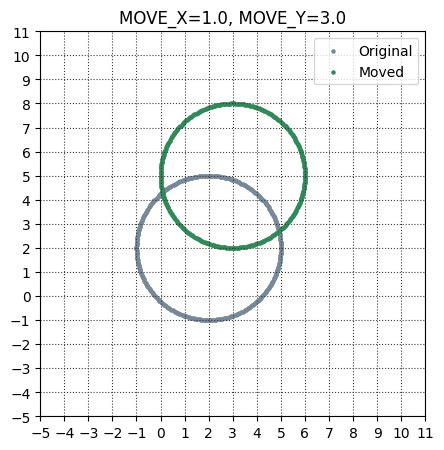

In [63]:
MOVE_X = 1.0 # x方向の並進距離
MOVE_Y = 3.0 # y方向の並進距離

MOVE = np.array([
    [1, 0, MOVE_X],
    [0, 1, MOVE_Y],
    [0, 0, 1]])

# あえて余計な次元を1つ足した円の表現
circle = np.array([circle_x, circle_y, np.ones(360)])

# 並進する
moved_circle = np.matmul(MOVE, circle)

fig = plt.figure(figsize=(5, 5))

ax_move= fig.add_subplot(1, 1, 1)
ax_move.set_aspect('equal')

ax_move.set_xlim(-5, 5)
ax_move.set_ylim(-5, 5)
ax_move.set_xticks(np.arange(-5, 12, 1.0))
ax_move.set_yticks(np.arange(-5, 12, 1.0))
ax_move.grid(color=THINGRAY, linestyle=':')
ax_move.set_title(f'MOVE_X={MOVE_X}, MOVE_Y={MOVE_Y}', loc='center')

ax_move.scatter(circle[0], circle[1], s=5, c=LIGHTGRAY, label='Original')
ax_move.scatter(moved_circle[0], moved_circle[1], s=5, c=GREEN, label='Moved')
plt.legend()

plt.show()

### 1-3. 用語等まとめ

実用上、以下の用語については正確に理解する必要はないが、概要を知っておく必要があるため補足する。

- アフィン変換とは一般的に、解説した回転拡大、並進の3種類に、剪断（シアー）を加えた4種類の変換及び、それらを組み合わせた合成変換全ての総称である。

- 計算のためのダミー次元を1個付与した$(x, y, 1)^T$のような座標は、**同次座標**と呼ばれる。

- **２次元の点が3次元の同次座標で表されるように、3次元の座標上の点は、ダミー次元を1つ加えた4次元の同次座標として表される。**

## 2. 同次変換行列 | Homogenious Transformation Matrix

$\theta$ 回転してから、$x$方向に$p$だけ並進した後、$y$方向に$b$倍ズームする、のような複雑な変換を行うとき、並進と回転・拡大の変換行列の形状が異なると、一度に計算できないため不便である。  
回転・拡大変換を表す行列も3x3にして、全て行列積で処理したい。
  
例えば、回転の変換行列を$R(\theta)$, 拡大（ズーム）の変換行列を$Z(a, b)$, 並進の変換行列を$M(p, q)$とした時、  
座標$P = (x, y)$を回転 -> 拡大 -> 並進の順に変換した移動後の点$P' = (x', y')$を、

$$
\boldsymbol P' = \boldsymbol M\left(p, q\right) \boldsymbol Z\left(a, b\right) \boldsymbol R\left(\theta\right) \boldsymbol P
$$

といっぺんに計算できるようにしたい。

1. 一連の変換を表現する変換行列を、1つの行列式で表すことができる
2. たくさんの点を一度に変換するとき、GPUで並列化できる（1.1節を参照）

計算機で計算するにあたり、特に2.は重要。

以上のモチベーションから、回転・拡大の変換行列も3x3で表現する。

### 2-1 回転、拡大の変換行列を3x3にする

1-1で扱った回転拡大の行列、
$
\left[\begin{array}{c}
a & 0 \\
0 & b \\
\end{array}\right]
$
と
$
\left[\begin{array}{c}
cos\theta & -sin\theta \\
sin\theta & cos\theta \\
\end{array}\right]
$
は、2x2の正方行列なので、そのままでは並進を表す3x3の正方行列と統合できない。  
  
よって、回転拡大自体には不要なダミー次元を2x2の変換行列に加えて、以下のような3x3の正方行列にする。  

拡大（ズーム）は、
$
\left[\begin{array}{cc|c}
a & 0 & 0 \\
0 & b & 0 \\
\hline
0 & 0 & 1 \\
\end{array}\right]
$
回転は、
$
\left[\begin{array}{cc|c}
cos\theta & -sin\theta & 0 \\
sin\theta & cos\theta  & 0 \\
\hline
0 & 0 & 1 \\
\end{array}\right]
$

2次元の同次座標$(x, y, 1)^T$をこれらの変換行列で変換してみる。それぞれ、計算結果（行列積）の3列目を無視すれば、回転拡大が問題無くできていることが確認できる。

$$
\left[\begin{array}{c}
a & 0 & 0 \\
0 & b & 0 \\
0 & 0 & 1 \\
\end{array}\right]

\left[\begin{array}{c}
x \\
y \\
1 \\
\end{array}\right]

=

\left[\begin{array}{c}
ax \\
by \\
1 \\
\end{array}\right] \cdots (2)
$$

$$
\left[\begin{array}{cc|c}
cos\theta & -sin\theta & 0 \\
sin\theta & cos\theta  & 0 \\
\hline
0 & 0 & 1 \\
\end{array}\right]

\left[\begin{array}{c}
x \\
y \\
1 \\
\end{array}\right]

=

\left[\begin{array}{c}
xcos\theta - ysin\theta \\
xsin\theta + ycos\theta \\
1 \\
\end{array}\right] \cdots (3)

$$

1.2節の式(1)が、2次元座標における**並進の同次変換行列**、本節の式(2)中の変換行列、式（3）中の変換行列がそれぞれ、**拡大（ズーム）の同次変換行列、回転の同次変換行列**である。  
また、同次変換行列で行う変換を**同次変換**と呼ぶことがある。

- ズームの同次変換行列 $Z_{HG} = \left[\begin{array}{c}
a & 0 & 0 \\
0 & b & 0 \\
0 & 0 & 1 \\
\end{array}\right]$

- 回転の同次変換行列 $R_{HG} = \left[\begin{array}{c}
cos\theta & -sin\theta & 0\\
sin\theta & cos\theta & 0\\
0 & 0 & 1 \\
\end{array}\right]$

- 並進の同次変換行列 $M_{HG} = \left[\begin{array}{c}
1 & 0 & p \\
0 & 1 & q \\
0 & 0 & 1 \\
\end{array}\right]$

### 2-2. 合成変換

同次変換行列同士は掛け合わせることができるため、**複数の変換を組み合わせ合成変換は、行列積により簡単に表せる。**  
  
例えば、原点を中心$\theta$回転した後、$x$方向に$p$, $y$方向に$q$並進するような移動を表す行列は、  

$$
A = Z_{HG}R_{HG} = 
\left[\begin{array}{c}
1 & 0 & p \\
0 & 1 & q \\
0 & 0 & 1 \\
\end{array}\right]

\left[\begin{array}{c}
cos\theta & -sin\theta & 0\\
sin\theta & cos\theta & 0\\
0 & 0 & 1 \\
\end{array}\right]

= 

\left[\begin{array}{c}
cos\theta & -sin\theta & p \\
sin\theta & cos\theta & q \\
0 & 0 & 1 \\
\end{array}\right]
$$

と覚えやすい形で表される。**ロボティクス分野では、回転と並進を一度に行うこの行列$A$をよく使用する。**

### 2-3. 注意：同次変換は交換可能ではない

同次変換は、行列積によって行うため、変換の順序が重要であり、**順番を入れ替えてしまうと全く異なる結果になるため注意する。**  
例えば、2-2節の行列$A$の変換を逆にした形、並進 -> 回転の順に変換する行列$B$を考えると、

$$
B = R_{HG}Z_{HG} = 
\left[\begin{array}{c}
cos\theta & -sin\theta & 0\\
sin\theta & cos\theta & 0\\
0 & 0 & 1 \\
\end{array}\right]

\left[\begin{array}{c}
1 & 0 & p \\
0 & 1 & q \\
0 & 0 & 1 \\
\end{array}\right]

= 

\left[\begin{array}{c}
cos\theta & -sin\theta & pcos\theta - qsin\theta \\
sin\theta & cos\theta & psin\theta + qcos\theta \\
0 & 0 & 1 \\
\end{array}\right]
$$

となり、$A \neq B$ である。  

ロボティクス分野における、実用上の複雑な座標変換を考えるとき、変換の順序に注意することは特に重要なので、意識しておいた方が良いと思われる。

### 2-4. まとめ

- 回転・拡大・並進は、同次座標に対する変換として、全て同じ形状の行列で表せ
- 複数の変換が組み合わされた合成変換は、変換行列同士の行列積になる
- 変換同士は交換可能ではないため、順序が非常に重要

## 3. Pythonによるハンズオンで確認する

1, 2章を総合した内容を、Pythonによるハンズオンで確認する。  
手順は以下。
  
1. 変換行列'ZOOM_HG, ROTATION_HG, MOVE_HG'を作る
2. 円を点群で表現し、1.の変換行列をかけて変換してみる
3. 同様に、合成変換（例えば、回転 -> 並進）を行う行列を作り、2と同様に円を変換してみる
4. 回転 ->  並進と並進 -> 回転など、変換の順序によって結果が違うことを、図示により確認する

### 3-1. スタイリングを共通化した、座標平面を出力するクラスを実装する

多数の変換を用意しその違いを図示して確認するため、スタイリングを共通化するためのPythonクラスを用意する。

In [64]:
import matplotlib
import matplotlib.pyplot as plt

class PltCoordPlanes():
    def __init__(
            self,
            width: int, 
            height: int,
            row: int,
            column: int,
            x_lim: tuple,
            y_lim: tuple,
            title: str | None = None,
            legend: bool = False):
        
        self.width = width
        self.height = height
        self.row = row
        self.column = column
        self.xlim = x_lim
        self.ylim = y_lim
        self.title = title
        self.legend = legend

        self.figure : matplotlib.figure.Figure \
            = plt.figure(
                figsize=(self.width, self.height),
                facecolor='white')
        
        if self.title is not None:
            self.figure.suptitle(self.title, fontsize=24)

        self.n_subplots = 0
        self.n_subplots_lim = row * column
        self.list = []
        self.dict = {}

    def add_plot(self, title: str) -> matplotlib.figure.Figure:
        if self.n_subplots < self.n_subplots_lim:
            self.n_subplots += 1
            subplot = self.figure.add_subplot(
                self.row,
                self.column,
                self.n_subplots)

            subplot.set_title(title, loc='center', y=-0.12, fontsize=16)
            
            x_lbound, x_ubound = self.xlim
            y_lbound, y_ubound = self.ylim

            subplot.set_xlim(x_lbound, x_ubound)
            subplot.set_ylim(y_lbound, y_ubound)
            subplot.set_xticks(np.arange(x_lbound, x_ubound, 1.0))
            subplot.set_yticks(np.arange(y_lbound, y_ubound, 1.0))
            subplot.grid(color=THINGRAY, linestyle=':')
            
            subplot.set_aspect('equal')
            
            self.list.append(subplot)
            self.dict[title] = subplot
            
            return self.list[self.n_subplots - 1]
        else:
            raise Exception("Cannot add subplot any more.")

    def __iter__(self):
        yield from self.list
    
    def __getitem__(self, _slice):
        if isinstance(_slice, int):
            return self.list[_slice]
        elif isinstance(_slice, str):
            return self.dict[_slice]
        else:
            raise Exception("Invalid arg type of __getitem__")
    def show(self):
        if self.legend:
            for subplot in self:
                subplot.legend(fontsize=16)
        plt.show()

### 3-2. 回転・拡大・並進とその合成変換を表す行列を用意し、円を変換する

個々の変換の同次変換行列を作成することで、その合成変換について非常に簡潔に記述できることに、注意してほしい。

In [65]:
RADIUS = 3.0
CENTER = np.array([2.0, 2.0])
ZOOM_X = 2.0
ZOOM_Y = 0.5
ROTATION_DEG = 30
MOVE_X = 1.0 # x方向の並進距離
MOVE_Y = 3.0 # y方向の並進距離

# HGはHomogeneousの意味

ZOOM_HG = np.array([
    [ZOOM_X, 0, 0],
    [0, ZOOM_Y, 0],
    [0, 0, 1]])

ROTATION_HG = np.array([
    [np.cos(np.radians(ROTATION_DEG)), -np.sin(np.radians(ROTATION_DEG)), 0],
    [np.sin(np.radians(ROTATION_DEG)), np.cos(np.radians(ROTATION_DEG)), 0],
    [0, 0, 1]])

MOVE_HG = np.array([
    [1, 0, MOVE_X],
    [0, 1, MOVE_Y],
    [0, 0, 1]])

x_series = np.arange(360, dtype=float)
y_series = np.arange(360, dtype=float)

circle_x = RADIUS * np.cos(np.radians(x_series)) + CENTER[0]
circle_y = RADIUS * np.sin(np.radians(y_series)) + CENTER[1]

# 同次座標による円の行列表現
circle_hg = np.array([circle_x, circle_y, np.ones(360)])

# 1 ~ 5点目までの同次座標を確認
print(circle_hg.shape)
print(circle_hg[:10][:])

# ズーム
zoomed_circle = np.matmul(ZOOM_HG, circle_hg)
# 回転
rotated_circle = np.matmul(ROTATION_HG, circle_hg)
# 並進
moved_circle = np.matmul(MOVE_HG, circle_hg)

# ズーム -> 回転
zoom_rotate_circle = np.matmul(ROTATION_HG, zoomed_circle)
# 回転 -> ズーム
rotate_zoom_circle = np.matmul(ZOOM_HG, rotated_circle)

# 回転 -> 並進
rotate_move_circle = np.matmul(MOVE_HG, rotated_circle)
# 並進 -> 回転
move_rotate_circle = np.matmul(ROTATION_HG, moved_circle)

# 並進 -> ズーム
move_zoom_circle = np.matmul(ZOOM_HG, moved_circle)
# ズーム ->  並進
zoom_move_circle = np.matmul(MOVE_HG, zoomed_circle)

(3, 360)
[[5.         4.99954309 4.99817248 ... 4.9958886  4.99817248 4.99954309]
 [2.         2.05235722 2.10469849 ... 1.84299213 1.89530151 1.94764278]
 [1.         1.         1.         ... 1.         1.         1.        ]]


### 3-3. 図示による確認

変換前後の図形を図示し、実際の結果を目で見て確認する。  
変換の順序を逆にした2つの合成変換同士を比較し、結果が異なることを目で見て理解する。

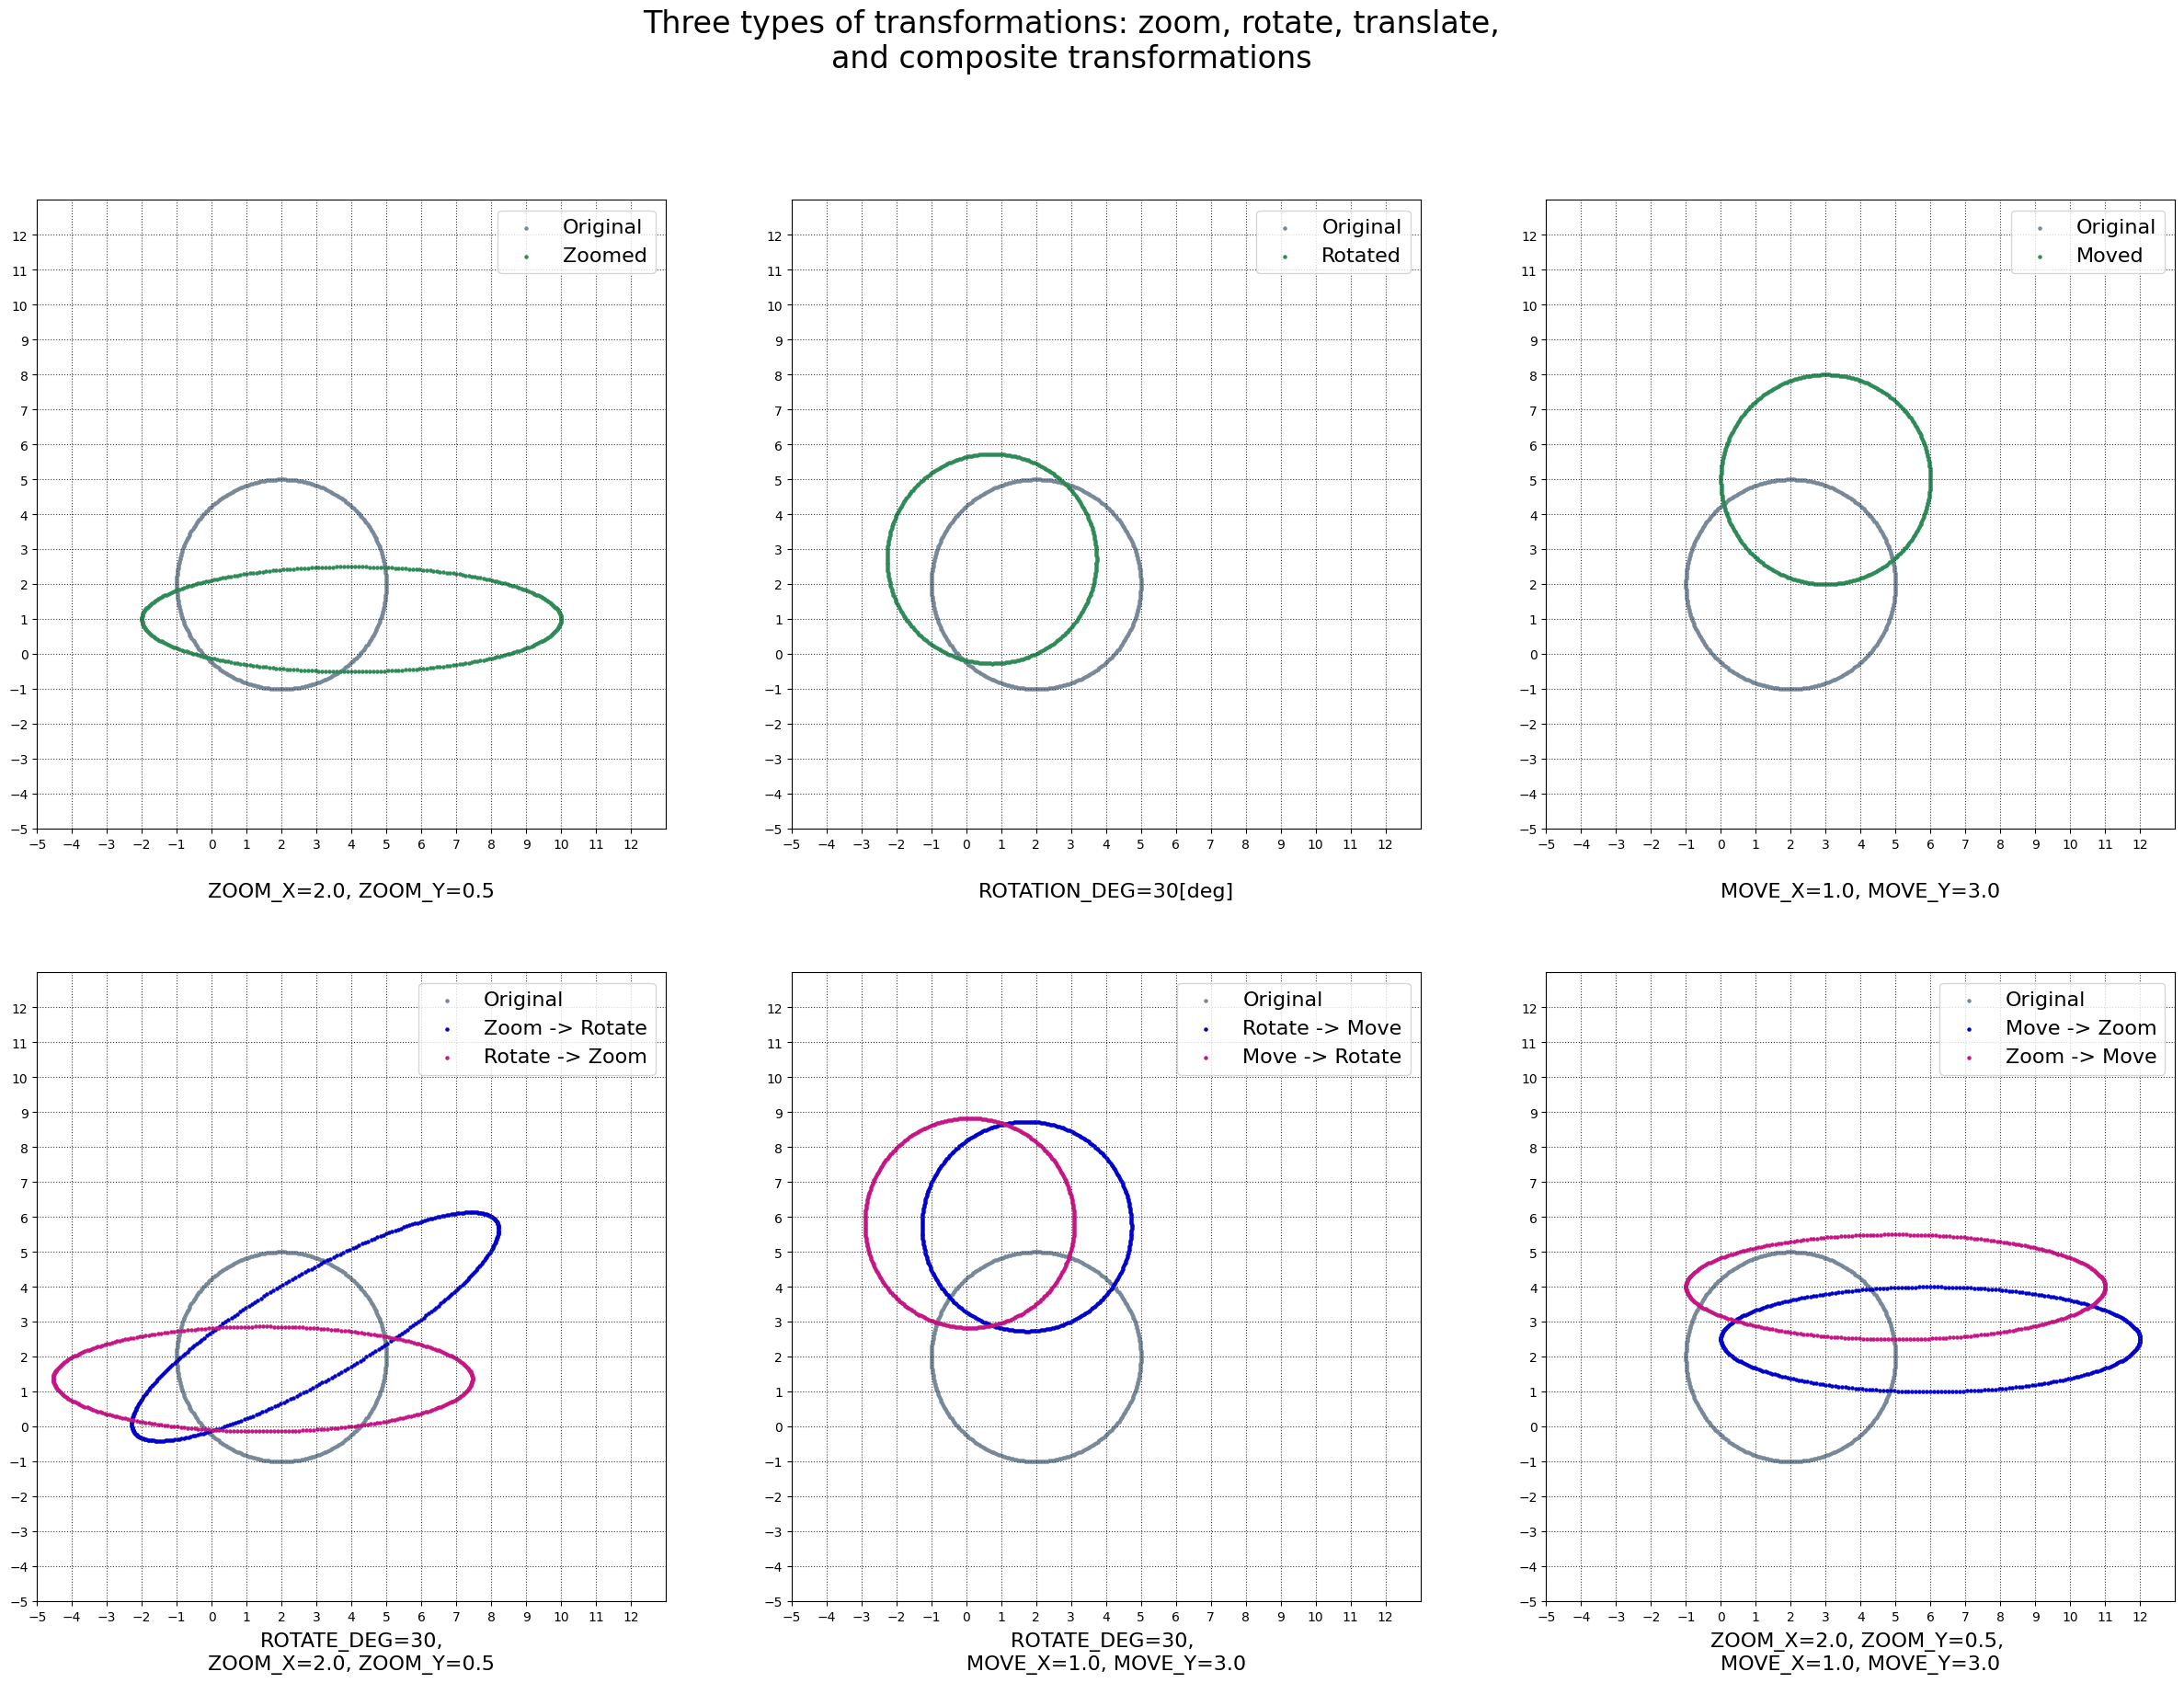

In [68]:
# プロットの描画
fig = PltCoordPlanes(
    width=30,
    height=20,
    row=2,
    column=3,
    x_lim=(-5, 13),
    y_lim=(-5, 13),
    title="Three types of transformations: zoom, rotate, translate,\nand composite transformations",
    legend=True,)

# ズーム
ax_zoom = fig.add_plot(title=f'ZOOM_X={ZOOM_X}, ZOOM_Y={ZOOM_Y}')
ax_zoom.scatter(circle[0], circle[1], s=5, c=LIGHTGRAY, label='Original') # 散布図にする関係でx, y座標に分解する
ax_zoom.scatter(zoomed_circle[0], zoomed_circle[1], s=5, c=GREEN
, label='Zoomed')

# 回転
ax_rotation = fig.add_plot(title=f'ROTATION_DEG={ROTATION_DEG}[deg]')
ax_rotation.scatter(circle[0], circle[1], s=5, c=LIGHTGRAY, label='Original')
ax_rotation.scatter(rotated_circle[0], rotated_circle[1], s=5, c=GREEN
, label='Rotated')

# 並進
ax_move = fig.add_plot(title=f'MOVE_X={MOVE_X}, MOVE_Y={MOVE_Y}')
ax_move.scatter(circle[0], circle[1], s=5, c=LIGHTGRAY, label='Original')
ax_move.scatter(moved_circle[0], moved_circle[1], s=5, c=GREEN
, label='Moved')

# ズーム -> 回転 と 回転 -> ズーム
ax_zoom_and_rotate = fig.add_plot(title=f'ROTATE_DEG={ROTATION_DEG},\nZOOM_X={ZOOM_X}, ZOOM_Y={ZOOM_Y}')
ax_zoom_and_rotate.scatter(circle[0], circle[1], s=5, c=LIGHTGRAY, label='Original', )
ax_zoom_and_rotate.scatter(zoom_rotate_circle[0], zoom_rotate_circle[1], s=5, c=BLUE, label='Zoom -> Rotate')
ax_zoom_and_rotate.scatter(rotate_zoom_circle[0], rotate_zoom_circle[1], s=5, c=VIOLET, label='Rotate -> Zoom')

# 回転 -> 並進　と　並進 -> 回転
ax_rotate_and_move = fig.add_plot(title=f'ROTATE_DEG={ROTATION_DEG}, \nMOVE_X={MOVE_X}, MOVE_Y={MOVE_Y}')
ax_rotate_and_move.scatter(circle[0], circle[1], s=5, c=LIGHTGRAY, label='Original')
ax_rotate_and_move.scatter(rotate_move_circle[0], rotate_move_circle[1], s=5, c=BLUE, label='Rotate -> Move')
ax_rotate_and_move.scatter(move_rotate_circle[0], move_rotate_circle[1], s=5, c=VIOLET, label='Move -> Rotate')

# 並進 -> ズーム と　ズーム -> 並進
ax_move_and_zoom = fig.add_plot(title=f'ZOOM_X={ZOOM_X}, ZOOM_Y={ZOOM_Y}, \nMOVE_X={MOVE_X}, MOVE_Y={MOVE_Y}')
ax_move_and_zoom.scatter(circle[0], circle[1], s=5, c=LIGHTGRAY, label='Original')
ax_move_and_zoom.scatter(move_zoom_circle[0], move_zoom_circle[1], s=5, c=BLUE, label='Move -> Zoom')
ax_move_and_zoom.scatter(zoom_move_circle[0], zoom_move_circle[1], s=5, c=VIOLET, label='Zoom -> Move')

fig.show()